In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import pandas as pd
from scipy.stats import linregress
plt.style.use("fivethirtyeight")

In [2]:
# Limits of project: U.S. movie industry only
# Timeframe: 1997 – 2017
# Data source: IMDB
# Objective: research on the trends and continuing viability of the movie industry
# Charts and analysis to focus on:
#                 - examine movies made between the years 1997 thru 2017 and the growth of viewership
# 	                      based on gross income divided by average ticket price.
# 	                      (see Nick’s slack: https://www.natoonline.org/data/ticket-price/ )
#                - examine movie viewer demographics by gender
#                - examine movie viewer gender genre preferences
#                - examine movie viewer demographics by age
#                - examine movie viewer age genre preferences
#                - examine the top 5 production companies by gross income and their movie genre focus
#                - examine the bottom 5 production companies by gross income and their movie genre focus

In [3]:
IMDB_movies=pd.read_csv("Resources/IMDb movies.csv")
IMDB_ratings=pd.read_csv("Resources/IMDb ratings.csv")
IMDB_ratings

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,6.1,537,6.3,6.0,54,17,55,121,122,...,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,tt0001892,5.9,171,6.1,6.0,5,6,17,41,52,...,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0
2,tt0002101,5.2,420,5.2,5.0,12,8,16,60,89,...,5.5,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0
3,tt0002130,7.0,2019,6.9,7.0,194,208,386,571,308,...,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
4,tt0002199,5.7,438,5.8,6.0,28,15,42,75,114,...,4.8,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,7.2,219,8.1,9.0,86,37,33,15,17,...,5.6,6.0,6.7,3.0,2.0,4.0,5.0,14.0,7.1,45.0
81269,tt9905412,7.8,510,7.8,9.0,184,80,91,39,10,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,3.0
81270,tt9905462,8.4,604,8.1,9.0,280,80,101,31,9,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0
81271,tt9911774,8.4,369,8.2,9.0,111,74,74,61,30,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0


In [4]:
IMDB_movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN,NaN,21.0,NaN
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791,NaN,NaN,NaN
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN,NaN,NaN,NaN
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
clean_movies=IMDB_movies.dropna()
clean_movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
488,tt0017136,Metropolis,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",In a futuristic city sharply divided between t...,8.3,148396,DEM 6000000,$ 1236166,$ 1349711,98.0,471.0,194.0
1005,tt0021749,City Lights,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",8.5,152716,$ 1500000,$ 19181,$ 32609,99.0,270.0,120.0
2336,tt0027977,Modern Times,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,"Charles Chaplin, Paulette Goddard, Henry Bergm...",The Tramp struggles to live in modern industri...,8.5,197969,$ 1500000,$ 163577,$ 445226,96.0,262.0,146.0
2687,tt0029583,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",...,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",Exiled into the dangerous forest by her wicked...,7.6,168735,$ 1499000,$ 184925486,$ 184925486,95.0,229.0,166.0
3100,tt0031381,Gone with the Wind,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",...,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",A manipulative woman and a roguish man conduct...,8.1,269664,$ 3977000,$ 200852579,$ 402352579,97.0,808.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80665,tt8772262,Midsommar,Midsommar,2019,2019-07-03,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary","English, Swedish",Ari Aster,...,"Florence Pugh, Jack Reynor, Vilhelm Blomgren, ...",A couple travels to Sweden to visit a rural ho...,7.2,78830,$ 10000000,$ 27426361,$ 41123770,72.0,1454.0,365.0
80858,tt9024106,Unplanned,Unplanned,2019,2019-10-04,"Biography, Drama",109,USA,English,"Chuck Konzelman, Cary Solomon",...,"Ashley Bratcher, Brooks Ryan, Robia Scott, Jar...",All Abby Johnson ever wanted to do was help wo...,5.8,10783,$ 6000000,$ 19005109,$ 19320481,10.0,531.0,32.0
80908,tt9082020,Cold Blood Legacy,Cold Blood Legacy,2019,2019-05-15,"Action, Thriller",91,"France, Ukraine, Belgium","French, English",Frédéric Petitjean,...,"Jean Reno, Sarah Lind, Joe Anderson, David Gya...",A hit-man lives isolated in a cabin at the edg...,4.5,2193,$ 2700000,$ 5083,$ 1009888,25.0,72.0,26.0
80946,tt9134216,Playing with Fire,Playing with Fire,2019,2019-11-08,"Comedy, Family",96,USA,English,Andy Fickman,...,"John Cena, Keegan-Michael Key, John Leguizamo,...",A crew of rugged firefighters meet their match...,4.5,1067,$ 29900000,$ 18847824,$ 21788746,24.0,49.0,16.0


In [6]:
clean_ratings=IMDB_ratings.dropna()
clean_ratings

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
3,tt0002130,7.0,2019,6.9,7.0,194,208,386,571,308,...,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
45,tt0004972,6.4,20885,6.5,7.0,3548,1668,3176,3789,2680,...,5.9,1000.0,6.0,687.0,6.6,357.0,6.3,7233.0,6.5,7837.0
73,tt0006864,7.8,13116,7.9,8.0,3372,2133,3011,2080,1085,...,7.5,599.0,8.1,637.0,7.5,324.0,7.7,4150.0,7.8,5657.0
132,tt0009892,5.9,941,7.1,10.0,562,13,23,34,15,...,7.5,60.0,8.0,36.0,6.1,27.0,7.3,112.0,5.0,347.0
155,tt0010323,8.1,51644,7.9,8.0,10756,10493,14688,8134,3239,...,8.2,3361.0,8.1,1224.0,7.5,553.0,8.0,12670.0,8.1,23911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81227,tt9783778,1.7,998,2.2,1.0,51,9,14,9,16,...,1.6,32.0,2.6,17.0,1.5,29.0,1.9,86.0,1.7,385.0
81234,tt9799992,6.6,867,6.9,7.0,79,97,174,216,132,...,6.6,43.0,7.1,10.0,4.7,22.0,6.4,63.0,6.4,354.0
81242,tt9817070,7.9,3210,8.1,8.0,920,580,831,429,195,...,7.9,81.0,7.1,13.0,7.0,9.0,7.9,125.0,7.7,1135.0
81246,tt9831136,5.0,1691,5.1,5.0,115,30,112,196,279,...,5.1,49.0,5.3,42.0,4.9,58.0,5.2,534.0,4.9,459.0


In [7]:
merge_data=clean_movies.merge(clean_ratings, on='imdb_title_id',how='inner')
merge_data

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0017136,Metropolis,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,8.3,8707.0,8.3,3334.0,8.0,665.0,8.3,30678.0,8.2,66535.0
1,tt0021749,City Lights,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,8.5,7216.0,8.4,2995.0,8.1,648.0,8.5,26265.0,8.5,69116.0
2,tt0027977,Modern Times,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,8.5,9280.0,8.4,3233.0,8.2,654.0,8.5,28002.0,8.5,92614.0
3,tt0029583,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",...,7.7,18021.0,8.0,3470.0,7.9,719.0,7.7,37903.0,7.6,70466.0
4,tt0031381,Gone with the Wind,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",...,8.5,34904.0,8.6,12294.0,8.0,739.0,8.2,63770.0,8.1,108032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,tt8663516,Child's Play,Child's Play,2019,2019-06-21,Horror,90,"France, Canada, USA","English, Vietnamese",Lars Klevberg,...,5.7,1188.0,5.8,226.0,5.4,207.0,6.0,4866.0,5.7,9902.0
4177,tt8772262,Midsommar,Midsommar,2019,2019-07-03,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary","English, Swedish",Ari Aster,...,7.0,3484.0,6.5,754.0,6.8,233.0,7.5,12466.0,7.1,29604.0
4178,tt9024106,Unplanned,Unplanned,2019,2019-10-04,"Biography, Drama",109,USA,English,"Chuck Konzelman, Cary Solomon",...,5.1,516.0,7.0,495.0,4.1,66.0,6.1,2376.0,4.8,2524.0
4179,tt9082020,Cold Blood Legacy,Cold Blood Legacy,2019,2019-05-15,"Action, Thriller",91,"France, Ukraine, Belgium","French, English",Frédéric Petitjean,...,4.4,54.0,4.7,42.0,3.9,63.0,4.5,214.0,4.5,1056.0


In [8]:
movies_after_1997=merge_data.loc[merge_data['year']>=1997].loc[merge_data['year']<=2017]
movies_after_1997.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
11,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-04-05,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,6.4,13963.0,6.7,3407.0,6.1,488.0,6.4,14442.0,6.3,37733.0
850,tt0116922,Lost Highway,Lost Highway,1997,1997-08-29,"Mystery, Thriller",134,"France, USA",English,David Lynch,...,7.5,7069.0,7.1,1620.0,6.9,581.0,7.4,18191.0,7.6,65662.0
879,tt0118541,8 Heads in a Duffel Bag,8 Heads in a Duffel Bag,1997,1997-11-28,"Adventure, Comedy, Crime",95,"USA, UK","English, Spanish",Tom Schulman,...,5.6,431.0,5.5,247.0,5.1,260.0,5.3,3793.0,5.4,2763.0
880,tt0118548,Absolute Power,Absolute Power,1997,1997-05-30,"Action, Crime, Drama",121,USA,"English, Spanish",Clint Eastwood,...,6.8,1387.0,7.1,1408.0,6.7,548.0,6.8,10520.0,6.7,22552.0
881,tt0118571,Air Force One,Air Force One,1997,1997-09-12,"Action, Drama, Thriller",124,"USA, Germany","English, Russian",Wolfgang Petersen,...,6.4,8448.0,6.8,3684.0,6.4,714.0,6.8,40217.0,6.3,75898.0


In [9]:
USA_movies=movies_after_1997.loc[movies_after_1997['country']=='USA']
USA_movies=USA_movies.reset_index()
USA_movies['genre']

0        Comedy, Fantasy, Romance
1            Action, Crime, Drama
2          Action, Horror, Sci-Fi
3                  Drama, History
4       Action, Adventure, Horror
                  ...            
1547               Comedy, Family
1548             Biography, Drama
1549        Comedy, Drama, Horror
1550      Drama, Fantasy, Romance
1551      Horror, Mystery, Sci-Fi
Name: genre, Length: 1552, dtype: object

In [10]:
USA_movies['budget']=USA_movies['budget'].str.replace("$",'')
USA_movies['budget']=USA_movies['budget'].astype(int)
USA_movies['usa_gross_income']=USA_movies['usa_gross_income'].str.replace("$",'')
USA_movies['usa_gross_income']=USA_movies['usa_gross_income'].astype(int)
USA_movies['worlwide_gross_income']=USA_movies['worlwide_gross_income'].str.replace("$",'')
USA_movies['worlwide_gross_income']=USA_movies['worlwide_gross_income'].astype(float)
USA_movies['worlwide_gross_income']

0        76019048.0
1        50068310.0
2       161376068.0
3        44229441.0
4       136885767.0
           ...     
1547     40140972.0
1548     17644496.0
1549     48333932.0
1550      1951683.0
1551      3697729.0
Name: worlwide_gross_income, Length: 1552, dtype: float64

In [11]:
for col in USA_movies.columns:
    print(col)
    


index
imdb_title_id
title
original_title
year
date_published
genre
duration
country
language
director
writer
production_company
actors
description
avg_vote
votes
budget
usa_gross_income
worlwide_gross_income
metascore
reviews_from_users
reviews_from_critics
weighted_average_vote
total_votes
mean_vote
median_vote
votes_10
votes_9
votes_8
votes_7
votes_6
votes_5
votes_4
votes_3
votes_2
votes_1
allgenders_0age_avg_vote
allgenders_0age_votes
allgenders_18age_avg_vote
allgenders_18age_votes
allgenders_30age_avg_vote
allgenders_30age_votes
allgenders_45age_avg_vote
allgenders_45age_votes
males_allages_avg_vote
males_allages_votes
males_0age_avg_vote
males_0age_votes
males_18age_avg_vote
males_18age_votes
males_30age_avg_vote
males_30age_votes
males_45age_avg_vote
males_45age_votes
females_allages_avg_vote
females_allages_votes
females_0age_avg_vote
females_0age_votes
females_18age_avg_vote
females_18age_votes
females_30age_avg_vote
females_30age_votes
females_45age_avg_vote
females_45age_vot

In [12]:
grouped_production_USA=USA_movies.groupby('production_company').sum()
grouped_production_USA


,index,year,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
production_company,,,,,,,,,,,,,,,,,,,,,
19 Entertainment,1649,2003,81,2.1,24510,12000000,4928883,4928883.0,14.0,306.0,...,2.6,2692.0,2.3,530.0,2.2,201.0,1.7,10920.0,2.2,6113.0
1984 Private Defense Contractors,1722,2014,114,6.5,106991,28000000,26307600,53181600.0,57.0,228.0,...,6.4,4964.0,6.7,1580.0,6.5,486.0,6.6,12815.0,6.5,53078.0
2 Loop Films,1515,2002,93,6.6,31504,500000,150277,264349.0,58.0,304.0,...,6.7,3991.0,6.6,854.0,6.1,352.0,6.9,9234.0,6.4,13559.0
21 Laps Entertainment,2825,2014,103,6.6,66549,19800000,34296320,41296320.0,44.0,175.0,...,6.7,7959.0,6.9,2130.0,5.9,328.0,6.7,12657.0,6.5,28571.0
25th Hour Productions,1530,2002,135,7.6,164139,5000000,13084595,23932055.0,67.0,464.0,...,7.6,9614.0,7.5,2203.0,7.0,552.0,7.7,30733.0,7.6,89941.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wiseau-Films,1734,2003,99,3.7,75089,6000000,549602,5581201.0,9.0,572.0,...,3.4,2885.0,3.1,507.0,2.9,328.0,3.7,16286.0,3.4,28554.0
Worldview Entertainment,20479,12083,634,37.3,164027,54000000,15222573,32296346.0,356.0,551.0,...,36.5,10037.0,37.1,3011.0,33.7,1496.0,37.7,25058.0,36.8,80956.0
Zucker Brothers Productions,1064,1998,103,6.5,54478,25000000,7027290,7027290.0,38.0,208.0,...,6.3,2005.0,5.6,435.0,5.5,398.0,6.6,18725.0,6.5,21585.0


In [13]:
sort_production_USA=grouped_production_USA.sort_values('usa_gross_income',ascending=False)
sort_production_USA.reset_index()
top_5_production=sort_production_USA.iloc[0:5]
top_5_production
reverse_sort_production=grouped_production_USA.sort_values('usa_gross_income',ascending=True)
bottom_5_production=reverse_sort_production.iloc[0:5]

bottom_5_production


,index,year,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
production_company,,,,,,,,,,,,,,,,,,,,,
Enderby Entertainment,3284,2012,98,4.8,9316,2500000,3003,8315.0,33.0,41.0,...,4.8,805.0,5.1,142.0,4.4,157.0,4.7,1404.0,4.7,5065.0
MRB Productions,3233,2013,95,6.0,8206,1300000,4404,4404.0,41.0,29.0,...,6.2,1057.0,6.4,233.0,5.3,153.0,6.1,1106.0,5.9,4393.0
Code Red,3005,2011,91,5.5,6108,6000000,5206,51017.0,52.0,28.0,...,5.5,862.0,5.5,283.0,5.1,130.0,5.5,1186.0,5.5,2951.0
Redwire Pictures,3196,2017,91,4.8,10976,5000000,5728,346729.0,50.0,114.0,...,5.2,664.0,5.5,236.0,4.4,177.0,5.0,2197.0,4.7,4514.0
Main Street Films,3165,2015,96,5.4,18143,15000000,6075,933847.0,44.0,62.0,...,5.5,1316.0,5.7,258.0,4.6,219.0,5.5,2165.0,5.2,8630.0


/Users/akashchhabra/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/akashchhabra/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


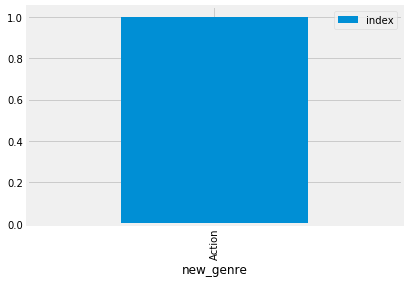

In [14]:
test_main_street_films=USA_movies.loc[USA_movies['production_company']=='Main Street Films']
main_street_films_test2=test_main_street_films
# test2['new_genre']
genre_main_street_films_list=main_street_films_test2['genre'].str.split(", ", n=2, expand=True)
main_street_films_test2.loc[:,'new_genre']=genre_main_street_films_list[0]
main_street_films_group_test=main_street_films_test2.groupby('new_genre').count()
main_street_films_group_test=main_street_films_group_test.sort_values('index',ascending=False)
main_street_films_group_test
main_street_films_group_test.plot(kind='bar',y='index')

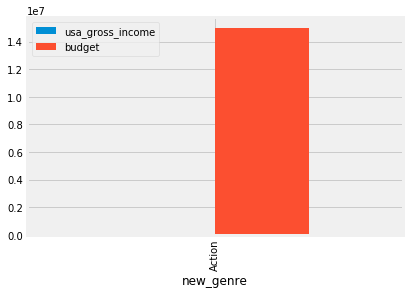

In [15]:
main_street_films_group_test2=main_street_films_test2.groupby('new_genre').mean()
main_street_films_group_test2['budget']
main_street_films_group_test2['usa_gross_income']
main_street_films_group_test2=main_street_films_group_test2.sort_values('usa_gross_income',ascending=False)
main_street_films_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

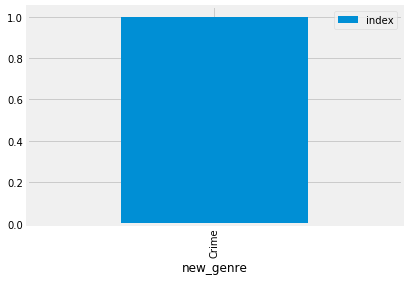

In [16]:
test_redwire_prictures=USA_movies.loc[USA_movies['production_company']=='Redwire Pictures']
redwire_prictures_test2=test_redwire_prictures
# test2['new_genre']
genre_redwire_prictures_list=redwire_prictures_test2['genre'].str.split(", ", n=2, expand=True)
redwire_prictures_test2.loc[:,'new_genre']=genre_redwire_prictures_list[0]
redwire_prictures_group_test=redwire_prictures_test2.groupby('new_genre').count()
redwire_prictures_group_test=redwire_prictures_group_test.sort_values('index',ascending=False)
redwire_prictures_group_test
redwire_prictures_group_test.plot(kind='bar',y='index')

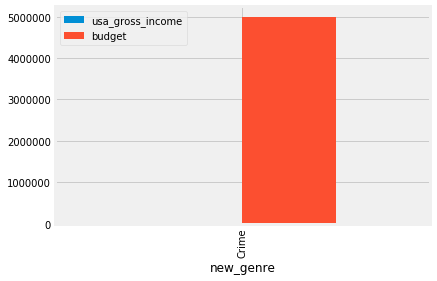

In [17]:
redwire_prictures_test2=redwire_prictures_test2.groupby('new_genre').mean()
redwire_prictures_test2['budget']
redwire_prictures_test2['usa_gross_income']
redwire_prictures_test2=redwire_prictures_test2.sort_values('usa_gross_income',ascending=False)
redwire_prictures_test2.plot(kind='bar',y=['usa_gross_income','budget'])

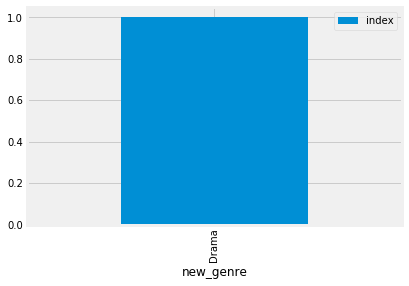

In [18]:
test_code_red=USA_movies.loc[USA_movies['production_company']=='Code Red']
code_red_test2=test_code_red
# test2['new_genre']
genre_code_red_list=code_red_test2['genre'].str.split(", ", n=2, expand=True)
code_red_test2.loc[:,'new_genre']=genre_code_red_list[0]
code_red_group_test=code_red_test2.groupby('new_genre').count()
code_red_group_test=code_red_group_test.sort_values('index',ascending=False)
code_red_group_test
code_red_group_test.plot(kind='bar',y='index')

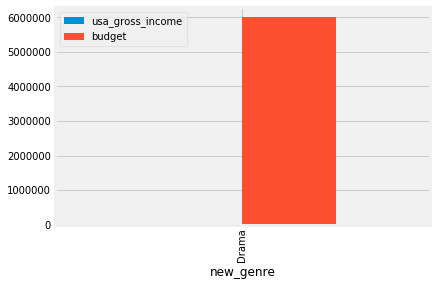

In [19]:
code_red_group_test2=code_red_test2.groupby('new_genre').mean()
code_red_group_test2['budget']
code_red_group_test2['usa_gross_income']
code_red_group_test2=code_red_group_test2.sort_values('usa_gross_income',ascending=False)
code_red_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

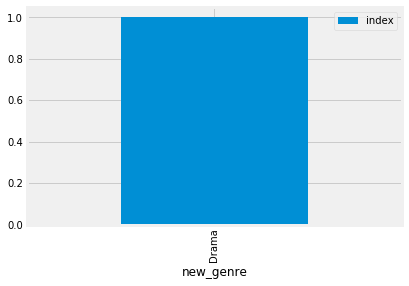

In [20]:
test_mrb_productions=USA_movies.loc[USA_movies['production_company']=='MRB Productions']
mrb_productions_test2=test_mrb_productions
# test2['new_genre']
genre_mrb_productions_list=mrb_productions_test2['genre'].str.split(", ", n=2, expand=True)
mrb_productions_test2.loc[:,'new_genre']=genre_mrb_productions_list[0]
mrb_productions_group_test=mrb_productions_test2.groupby('new_genre').count()
mrb_productions_group_test=mrb_productions_group_test.sort_values('index',ascending=False)
mrb_productions_group_test
mrb_productions_group_test.plot(kind='bar',y='index')

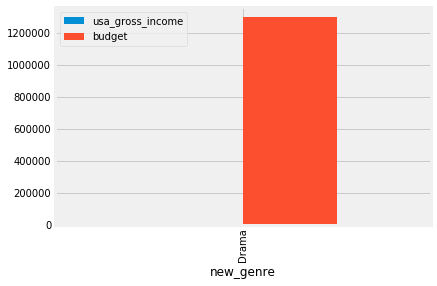

In [21]:
mrb_productions_group_test2=mrb_productions_test2.groupby('new_genre').mean()
mrb_productions_group_test2['budget']
mrb_productions_group_test2['usa_gross_income']
mrb_productions_group_test2=mrb_productions_group_test2.sort_values('usa_gross_income',ascending=False)
mrb_productions_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

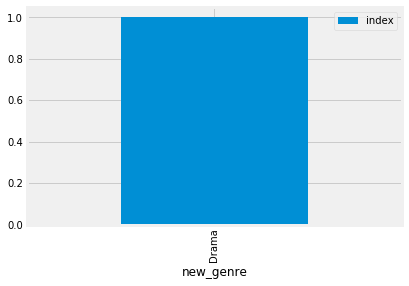

In [22]:
test_enderby_entertainment=USA_movies.loc[USA_movies['production_company']=='Enderby Entertainment']
enderby_entertainment_test2=test_enderby_entertainment
# test2['new_genre']
genre_enderby_entertainment_list=enderby_entertainment_test2['genre'].str.split(", ", n=2, expand=True)
enderby_entertainment_test2.loc[:,'new_genre']=genre_enderby_entertainment_list[0]
enderby_entertainment_group_test=enderby_entertainment_test2.groupby('new_genre').count()
enderby_entertainment_group_test=enderby_entertainment_group_test.sort_values('index',ascending=False)
enderby_entertainment_group_test
enderby_entertainment_group_test.plot(kind='bar',y='index')

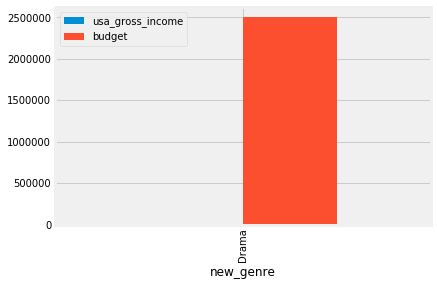

In [23]:
enderby_entertainment_group_test2=enderby_entertainment_test2.groupby('new_genre').mean()
enderby_entertainment_group_test2['budget']
enderby_entertainment_group_test2['usa_gross_income']
enderby_entertainment_group_test2=enderby_entertainment_group_test2.sort_values('usa_gross_income',ascending=False)
enderby_entertainment_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

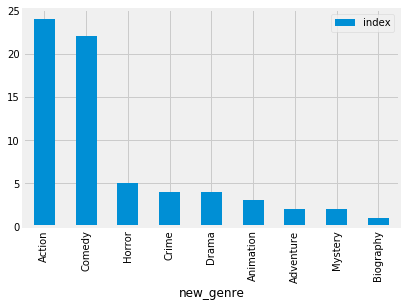

In [24]:
test_paramount_pictures=USA_movies.loc[USA_movies['production_company']=='Paramount Pictures']
paramount_pictures_test2=test_paramount_pictures
# test2['new_genre']
genre_paramount_pictures_list=paramount_pictures_test2['genre'].str.split(", ", n=2, expand=True)
paramount_pictures_test2.loc[:,'new_genre']=genre_paramount_pictures_list[0]
paramount_pictures_group_test=paramount_pictures_test2.groupby('new_genre').count()
paramount_pictures_group_test=paramount_pictures_group_test.sort_values('index',ascending=False)
paramount_pictures_group_test
paramount_pictures_group_test.plot(kind='bar',y='index')

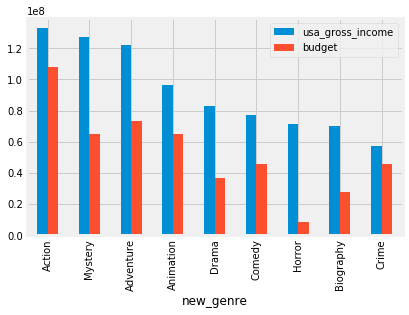

In [25]:
paramount_pictures_group_test2=paramount_pictures_test2.groupby('new_genre').mean()
paramount_pictures_group_test2['budget']
paramount_pictures_group_test2['usa_gross_income']
paramount_pictures_group_test2=paramount_pictures_group_test2.sort_values('usa_gross_income',ascending=False)
paramount_pictures_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

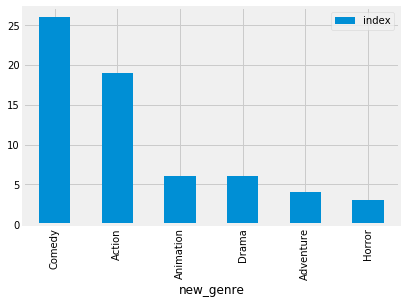

In [26]:
test_twentieth_century_fox=USA_movies.loc[USA_movies['production_company']=='Twentieth Century Fox']
twentieth_century_fox_test2=test_twentieth_century_fox
# test2['new_genre']
genre_twentieth_century_fox_list=twentieth_century_fox_test2['genre'].str.split(", ", n=2, expand=True)
twentieth_century_fox_test2.loc[:,'new_genre']=genre_twentieth_century_fox_list[0]
twentieth_century_fox_group_test=twentieth_century_fox_test2.groupby('new_genre').count()
twentieth_century_fox_group_test=twentieth_century_fox_group_test.sort_values('index',ascending=False)
twentieth_century_fox_group_test
twentieth_century_fox_group_test.plot(kind='bar',y='index')

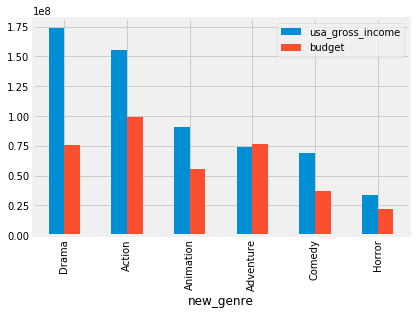

In [27]:
twentieth_century_fox_group_test2=twentieth_century_fox_test2.groupby('new_genre').mean()
twentieth_century_fox_group_test2['budget']
twentieth_century_fox_group_test2['usa_gross_income']
twentieth_century_fox_group_test2=twentieth_century_fox_group_test2.sort_values('usa_gross_income',ascending=False)
twentieth_century_fox_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

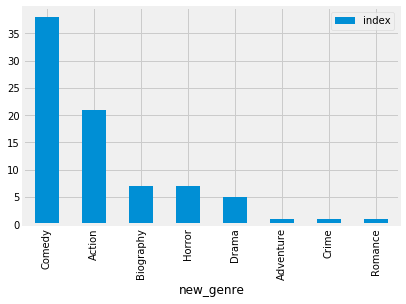

In [28]:
test_universal_pictures=USA_movies.loc[USA_movies['production_company']=='Universal Pictures']
universal_pictures_test2=test_universal_pictures
# test2['new_genre']
genre_universal_pictures_list=universal_pictures_test2['genre'].str.split(", ", n=2, expand=True)
universal_pictures_test2.loc[:,'new_genre']=genre_universal_pictures_list[0]
universal_pictures_group_test=universal_pictures_test2.groupby('new_genre').count()
universal_pictures_group_test=universal_pictures_group_test.sort_values('index',ascending=False)
universal_pictures_group_test
universal_pictures_group_test.plot(kind='bar',y='index')

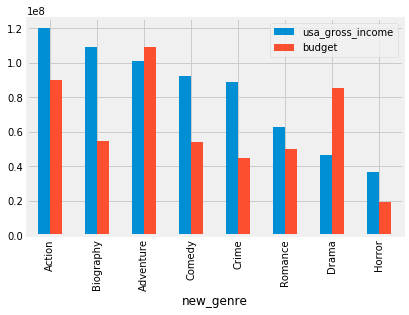

In [29]:
universal_pictures_group_test2=universal_pictures_test2.groupby('new_genre').mean()
universal_pictures_group_test2['budget']
universal_pictures_group_test2['usa_gross_income']
universal_pictures_group_test2=universal_pictures_group_test2.sort_values('usa_gross_income',ascending=False)
universal_pictures_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

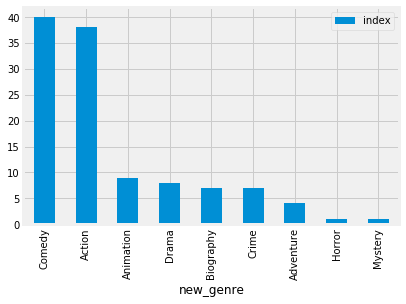

In [30]:
test_columbia=USA_movies.loc[USA_movies['production_company']=='Columbia Pictures']
columbia_test2=test_columbia
# test2['new_genre']
genre_columbia_list=columbia_test2['genre'].str.split(", ", n=2, expand=True)
columbia_test2.loc[:,'new_genre']=genre_columbia_list[0]
columbia_group_test=columbia_test2.groupby('new_genre').count()
columbia_group_test=columbia_group_test.sort_values('index',ascending=False)
columbia_group_test
columbia_group_test.plot(kind='bar',y='index')

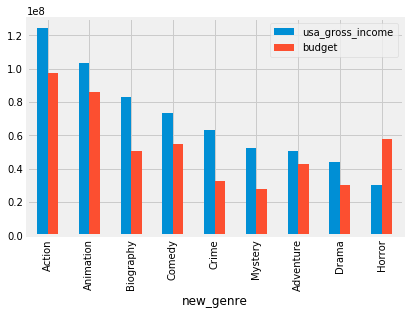

In [31]:
columbia_group_test2=columbia_test2.groupby('new_genre').mean()
columbia_group_test2['budget']
columbia_group_test2['usa_gross_income']
columbia_group_test2=columbia_group_test2.sort_values('usa_gross_income',ascending=False)
columbia_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])


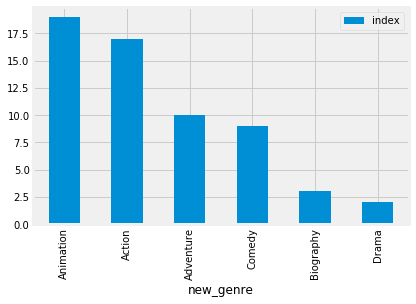

In [32]:
test_disney=USA_movies.loc[USA_movies['production_company']=='Walt Disney Pictures']
disney_test2=test_disney
# test2['new_genre']
genre_disney_list=disney_test2['genre'].str.split(", ", n=2, expand=True)
disney_test2.loc[:,'new_genre']=genre_disney_list[0]
disney_group_test=disney_test2.groupby('new_genre').count()
disney_group_test=disney_group_test.sort_values('index',ascending=False)
disney_group_test
disney_group_test.plot(kind='bar',y='index')

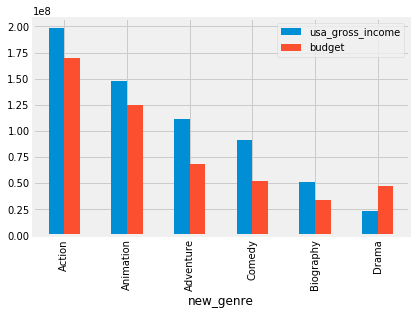

In [33]:
disney_group_test2=disney_test2.groupby('new_genre').mean()
disney_group_test2['budget']
disney_group_test2['usa_gross_income']
disney_group_test2=disney_group_test2.sort_values('usa_gross_income',ascending=False)
disney_group_test2.plot(kind='bar',y=['usa_gross_income','budget'])

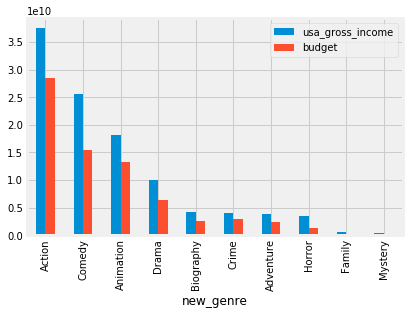

In [34]:
genre_list=USA_movies['genre'].str.split(", ", n=2, expand=True)
USA_movies['new_genre']=genre_list[0]
genre_list
grouped_genre=USA_movies.groupby('new_genre').sum()
sort_genre=grouped_genre.sort_values('usa_gross_income',ascending=False)
sort_genre
top_10_genre=sort_genre.iloc[0:10]
top_10_genre
top_10_genre.plot(kind='bar',y=['usa_gross_income','budget'])

In [35]:
sort_USA_movies=USA_movies.sort_values('usa_gross_income',ascending=False)
sort_USA_movies[['title','budget','usa_gross_income','year','production_company']].head()

,title,budget,usa_gross_income,year,production_company
1374,Star Wars: Episode VII - The Force Awakens,245000000,936662225,2015,Lucasfilm
720,Avatar,237000000,760507625,2009,Twentieth Century Fox
53,Titanic,200000000,659363944,1997,Twentieth Century Fox
485,Jurassic World,150000000,652270625,2015,Universal Pictures
785,The Avengers,220000000,623357910,2012,Marvel Studios


In [36]:
sort_budget_USA_movies=USA_movies.sort_values('budget',ascending=False)
sort_budget_USA_movies[['title','budget','usa_gross_income','year']].head(20)

,title,budget,usa_gross_income,year
1376,Star Wars: Episode VIII - The Last Jedi,317000000,620181382,2017
633,Pirates of the Caribbean: At World's End,300000000,309420425,2007
443,Superman Returns,270000000,200081192,2006
539,Tangled,260000000,200821936,2010
572,Spider-Man 3,258000000,336530303,2007
1419,Batman v Superman: Dawn of Justice,250000000,330360194,2016
1455,Captain America: Civil War,250000000,408084349,2016
545,John Carter,250000000,73078100,2012
1362,Avengers: Age of Ultron,250000000,459005868,2015
1374,Star Wars: Episode VII - The Force Awakens,245000000,936662225,2015


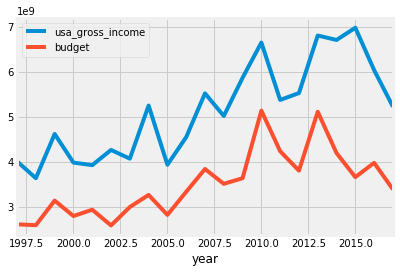

In [37]:
grouped_year=USA_movies.groupby('year').sum()
grouped_year.plot(kind='line',y=['usa_gross_income','budget'])

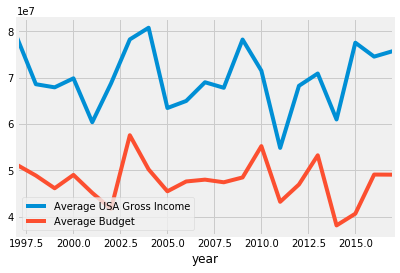

In [38]:
new_grouped_year=USA_movies.groupby('year').count()
number_titles=new_grouped_year['title']
number_titles
grouped_year['Number of titles']=number_titles
grouped_year['Average USA Gross Income']=grouped_year['usa_gross_income']/grouped_year['Number of titles']
grouped_year['Average Budget']=grouped_year['budget']/grouped_year['Number of titles']
grouped_year.plot(kind='line',y=['Average USA Gross Income','Average Budget'])

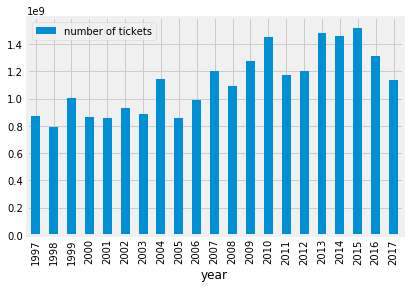

In [39]:
#average ticket price from National Association of Theatre Owners
ticket_price=[8.97,8.65,8.43,8.17,8.13,7.96,7.93,7.89,7.50,7.18,6.88,6.55,6.41,6.21,6.03,5.80,5.65,5.39,5.06,4.69,4.59]
for ticket in ticket_price:
    grouped_year['number of tickets']=grouped_year['usa_gross_income']/ticket
grouped_year.plot(kind='bar',y='number of tickets')

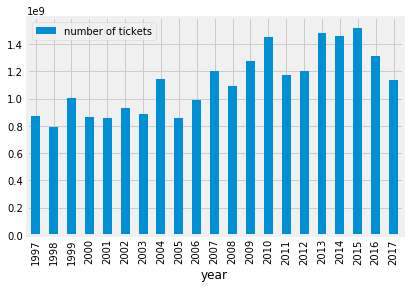

In [40]:
grouped_year['number of tickets']=grouped_year['usa_gross_income']/ticket
grouped_year.plot(kind='bar',y='number of tickets')

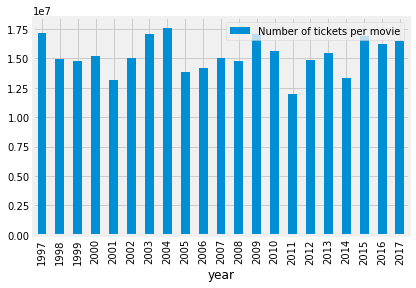

In [41]:
grouped_year['Number of tickets per movie']=grouped_year['number of tickets']/grouped_year['Number of titles']
grouped_year.plot(kind='bar',y='Number of tickets per movie')

The r_value is 0.7096465604529201


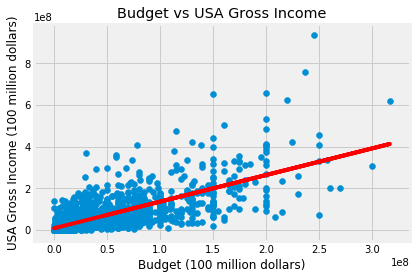

In [42]:
(slope,intercept,r_value,_,_)=linregress(USA_movies['budget'],USA_movies['usa_gross_income'])
print(f'The r_value is {r_value}')
fit=slope*USA_movies['budget']+intercept
fig, ax= plt.subplots()
ax.plot(USA_movies['budget'],fit,c='r')
ax.scatter(USA_movies['budget'],USA_movies['usa_gross_income'])
plt.xlabel('Budget (100 million dollars)')
plt.ylabel('USA Gross Income (100 million dollars)')
plt.title('Budget vs USA Gross Income')
plt.show()

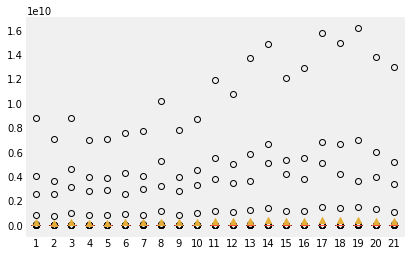

In [43]:
plt.boxplot(grouped_year,showmeans=True)
plt.grid()
plt.show()

In [44]:
USA_movies['worlwide_gross_income']

0        76019048.0
1        50068310.0
2       161376068.0
3        44229441.0
4       136885767.0
           ...     
1547     40140972.0
1548     17644496.0
1549     48333932.0
1550      1951683.0
1551      3697729.0
Name: worlwide_gross_income, Length: 1552, dtype: float64

In [45]:
# Read cleaned movie data into pandas dataframe
IMDB_movies_df=pd.read_csv("Resources/IMDB_movies_and_ratings.csv")

# Data clean: remove old index from csv file
del IMDB_movies_df["Unnamed: 0"]

# Print a sample view of the data
IMDB_movies_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0017136,Metropolis,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,8.3,8707.0,8.3,3334.0,8.0,665.0,8.3,30678.0,8.2,66535.0
1,tt0021749,City Lights,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,8.5,7216.0,8.4,2995.0,8.1,648.0,8.5,26265.0,8.5,69116.0
2,tt0027977,Modern Times,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,8.5,9280.0,8.4,3233.0,8.2,654.0,8.5,28002.0,8.5,92614.0
3,tt0029583,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",...,7.7,18021.0,8.0,3470.0,7.9,719.0,7.7,37903.0,7.6,70466.0
4,tt0031381,Gone with the Wind,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",...,8.5,34904.0,8.6,12294.0,8.0,739.0,8.2,63770.0,8.1,108032.0


In [46]:
# Print a list of columns to view column names
print ("Column titles:  ")
print (" ")
for col in IMDB_movies_df.columns:
    print(col)
    
print (" ")
print ("-----------------------")    
print (" ")

# Print the records count to determine level of magnitude
print ("Number of movies in this dataset:  ")
len(IMDB_movies_df)    

Column titles:  
 
imdb_title_id
title
original_title
year
date_published
genre
duration
country
language
director
writer
production_company
actors
description
avg_vote
votes
budget
usa_gross_income
worlwide_gross_income
metascore
reviews_from_users
reviews_from_critics
weighted_average_vote
total_votes
mean_vote
median_vote
votes_10
votes_9
votes_8
votes_7
votes_6
votes_5
votes_4
votes_3
votes_2
votes_1
allgenders_0age_avg_vote
allgenders_0age_votes
allgenders_18age_avg_vote
allgenders_18age_votes
allgenders_30age_avg_vote
allgenders_30age_votes
allgenders_45age_avg_vote
allgenders_45age_votes
males_allages_avg_vote
males_allages_votes
males_0age_avg_vote
males_0age_votes
males_18age_avg_vote
males_18age_votes
males_30age_avg_vote
males_30age_votes
males_45age_avg_vote
males_45age_votes
females_allages_avg_vote
females_allages_votes
females_0age_avg_vote
females_0age_votes
females_18age_avg_vote
females_18age_votes
females_30age_avg_vote
females_30age_votes
females_45age_avg_vote
fema

4181

In [47]:
# This step prints out the column-headings of the workfile to determine the scope and level of magnitude.

In [48]:
# Filter data for movieS made from 1997 to present
# movies_made_after_1997 = IMDB_movies_df.loc[IMDB_movies_df["year"] >= 1997].loc[IMDB_movies_df["year"] <= 2017]
movies_made_after_1997 = IMDB_movies_df.loc[IMDB_movies_df["year"] >= 1997]

# Remove incomplete data from year 2019
movies_made_before_2018 = movies_made_after_1997.loc[IMDB_movies_df["year"] <= 2017]

# Filter data for movies made from 1997 to present that were made in the USA
USA_movies = movies_made_before_2018.loc[movies_made_after_1997["country"] == "USA"]
USA_movies.reset_index()
USA_movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
11,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-04-05,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,6.4,13963.0,6.7,3407.0,6.1,488.0,6.4,14442.0,6.3,37733.0
880,tt0118548,Absolute Power,Absolute Power,1997,1997-05-30,"Action, Crime, Drama",121,USA,"English, Spanish",Clint Eastwood,...,6.8,1387.0,7.1,1408.0,6.7,548.0,6.8,10520.0,6.7,22552.0
882,tt0118583,Alien Resurrection,Alien Resurrection,1997,1997-11-28,"Action, Horror, Sci-Fi",109,USA,English,Jean-Pierre Jeunet,...,6.6,9088.0,6.5,3140.0,6.4,753.0,6.0,35528.0,6.3,105860.0
883,tt0118607,Amistad,Amistad,1997,1998-02-27,"Drama, History",155,USA,"English, Mende, Spanish, Portuguese",Steven Spielberg,...,7.4,3837.0,7.7,1778.0,6.8,530.0,7.4,15413.0,7.2,31349.0
884,tt0118615,Anaconda,Anaconda,1997,1997-05-09,"Action, Adventure, Horror",89,USA,English,Luis Llosa,...,4.5,5727.0,4.8,1257.0,4.8,634.0,4.8,18113.0,4.7,43971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056,tt6003368,Diary of a Wimpy Kid: The Long Haul,Diary of a Wimpy Kid: The Long Haul,2017,2017-05-26,"Comedy, Family",91,USA,"English, Spanish",David Bowers,...,5.1,250.0,4.8,102.0,4.0,111.0,4.4,1041.0,4.7,1739.0
4063,tt6113488,The Case for Christ,The Case for Christ,2017,2017-04-07,"Biography, Drama",112,USA,English,Jon Gunn,...,6.3,432.0,7.1,323.0,4.5,98.0,6.6,1808.0,5.4,1816.0
4071,tt6217804,Tyler Perry's Boo 2! A Madea Halloween,Tyler Perry's Boo 2! A Madea Halloween,2017,2017-10-20,"Comedy, Drama, Horror",101,USA,English,Tyler Perry,...,4.6,227.0,4.9,144.0,3.2,84.0,3.8,1174.0,2.9,524.0
4072,tt6265828,A Ghost Story,A Ghost Story,2017,2017-08-11,"Drama, Fantasy, Romance",92,USA,"English, Spanish",David Lowery,...,6.4,2442.0,5.9,712.0,5.7,278.0,7.0,7351.0,6.7,21432.0


In [49]:
# Data preparation and cleaning: The data is filtered to include only the relevant data for the study.
#                             Data on USA movies for the years between 1997 and 2017 only, are isolated.

In [50]:
# Create, save to CSV and View dataset on number of viewers by year 
USA_movies_by_year = pd.DataFrame(USA_movies.groupby("year").sum())

# save merge data into a new csv file for further analysis
USA_movies_by_year.to_csv("Resources/USA_movies_by_year_from_1997.csv")

# show the data
USA_movies_by_year

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
year,,,,,,,,,,,,,,,,,,,,,
1997,5906,336.3,8799123,2830.0,19643.0,5907.0,336.3,8799123,342.1,343.0,...,336.2,588107.0,340.8,156891.0,318.8,30497.0,336.7,1727072.0,332.3,4016863.0
1998,5966,357.5,8723567,2932.0,24946.0,6247.0,357.5,8723567,364.0,368.0,...,356.7,623365.0,359.2,148671.0,333.0,29878.0,357.9,1759342.0,354.4,3917616.0
1999,7436,452.1,12017632,4022.0,44279.0,9424.0,452.1,12017632,460.2,463.0,...,451.8,911976.0,457.5,224555.0,422.3,36663.0,453.1,2467560.0,447.7,5258267.0
2000,6140,364.2,8069299,2877.0,27646.0,7520.0,364.2,8069299,372.4,378.0,...,364.5,619397.0,370.9,134630.0,340.5,29270.0,363.3,1588255.0,360.8,3719952.0
2001,7022,415.3,8754096,3233.0,30527.0,8638.0,415.3,8754096,425.6,430.0,...,414.0,663962.0,419.2,142261.0,382.7,31929.0,414.4,1708020.0,411.5,4026722.0
2002,6378,396.4,7508845,3387.0,33271.0,8861.0,396.4,7508845,405.4,407.0,...,395.4,539215.0,405.0,121416.0,368.3,29875.0,396.6,1513307.0,391.3,3476413.0
2003,5492,311.2,6965740,2478.0,27198.0,7568.0,311.2,6965740,321.0,315.0,...,312.9,498962.0,319.9,108324.0,290.2,26532.0,308.3,1381345.0,308.3,3284288.0
2004,6796,413.4,11586053,3427.0,35633.0,10139.0,413.4,11586053,425.4,426.0,...,414.4,909492.0,419.5,176731.0,384.5,34014.0,413.3,2202243.0,408.3,5474016.0
2005,6549,388.1,7926129,3234.0,30031.0,9805.0,388.1,7926129,400.6,406.0,...,390.6,641182.0,396.2,127901.0,360.0,29797.0,387.5,1617008.0,384.5,3827949.0


In [51]:
# The final step in the Gender-Age Group analysis is to group the data by year to show trends over time in the visualizations.

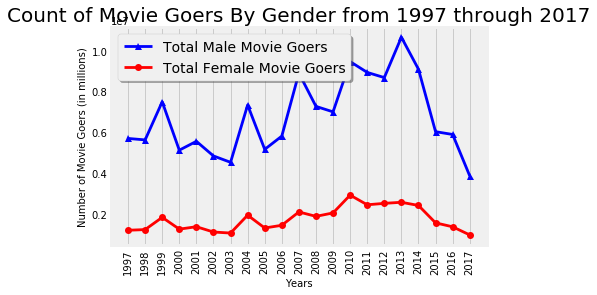

In [52]:
# Collect the years where data was collected
USA_movies_by_year.reset_index(inplace = True)

# Create labels for the X and Y axis
plt.title("Count of Movie Goers By Gender from 1997 through 2017", fontsize=20)
plt.xlabel("Years", fontsize=10)
plt.ylabel("Number of Movie Goers (in millions)", fontsize=10)
plt.xticks(range(1997,2018), rotation='vertical')

plt.style.use("seaborn-poster")
plt.grid(axis="y")

# Plot the chart and apply some styling
male_viewers, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['males_allages_votes'],
                         color='b', marker="^", markersize=7, label="Total Male Movie Goers")

female_viewers, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['females_allages_votes'],
                           color='r',  marker="o", markersize=7, label="Total Female Movie Goers")

plt.legend(handles=[male_viewers, female_viewers], fontsize=14, fancybox=True, shadow=True)

In [53]:
# The graph shows movie attendance by gender. 
# The disparity between the sexes show male movie goers are more inclined to include the movies as an entertainment option.

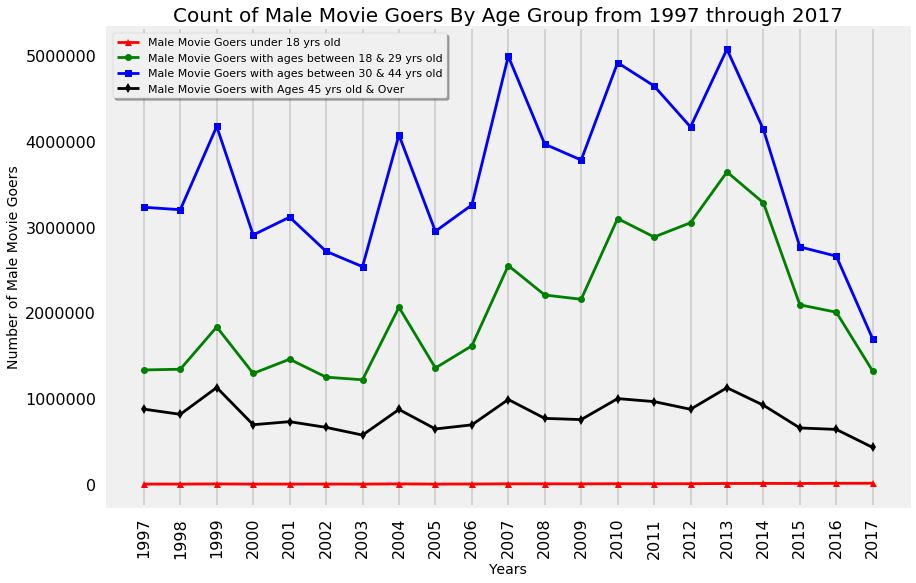

In [54]:
# Create Graph of Male Movie Goers by Age Group

# Create labels for the X and Y axis
plt.title("Count of Male Movie Goers By Age Group from 1997 through 2017", fontsize=20)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Number of Male Movie Goers", fontsize=14)
plt.xticks(range(1997,2018), rotation='vertical')

plt.style.use("seaborn-poster")
plt.grid(axis="y")

# Plot the chart and apply some styling
male_viewers_under18, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['males_0age_votes'],
                         color='r', marker="^", markersize=7, label="Male Movie Goers under 18 yrs old")

male_viewers_18_30, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['males_18age_votes'],
                           color='g',  marker="o", markersize=7,
                               label="Male Movie Goers with ages between 18 & 29 yrs old")

male_viewers_30_45, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['males_30age_votes'],
                         color='b', marker="s", markersize=7,
                               label="Male Movie Goers with ages between 30 & 44 yrs old")

male_viewers_over45, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['males_45age_votes'],
                           color='k',  marker="d", markersize=7,
                               label="Male Movie Goers with Ages 45 yrs old & Over")

plt.legend(handles=[male_viewers_under18, male_viewers_18_30, male_viewers_30_45, male_viewers_over45],
           fontsize=11, fancybox=True, shadow=True)

In [55]:
# The graph shows male movie viewer attendance by age-group. 
# Male movie goers between the ages of 30 to 44 years of age
#     have consistently outpaced all other age-groups in terms of attendance.

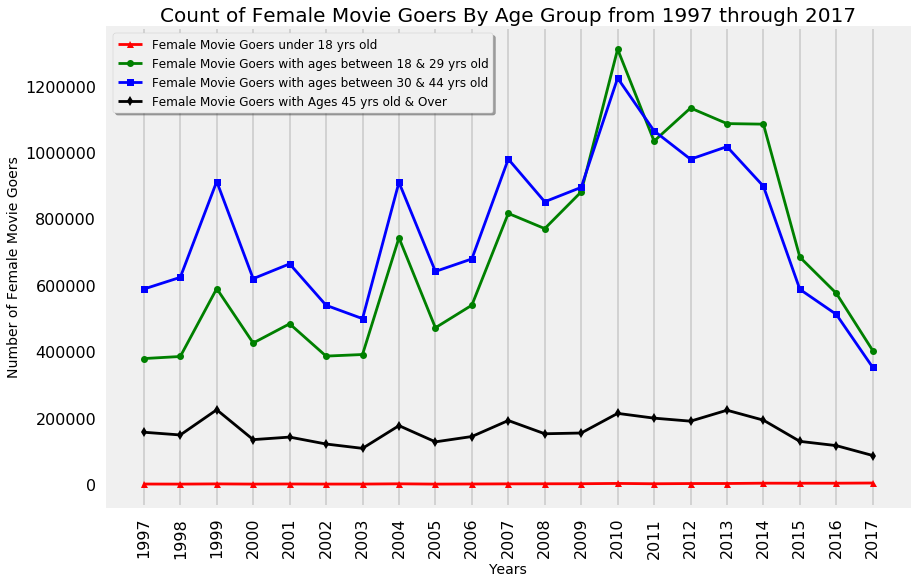

In [56]:
# Create Graph of Male Movie Goers by Age Group

# Create labels for the X and Y axis
plt.title("Count of Female Movie Goers By Age Group from 1997 through 2017", fontsize=20)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Number of Female Movie Goers", fontsize=14)
plt.xticks(range(1997,2018), rotation='vertical')

plt.style.use("seaborn-poster")
plt.grid(axis="y")

# Plot the charts and apply some styling
female_viewers_under18, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['females_0age_votes'],
                         color='r', marker="^", markersize=7, label="Female Movie Goers under 18 yrs old")

female_viewers_18_30, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['females_18age_votes'],
                           color='g',  marker="o", markersize=7,
                               label="Female Movie Goers with ages between 18 & 29 yrs old")

female_viewers_30_45, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['females_30age_votes'],
                         color='b', marker="s", markersize=7,
                               label="Female Movie Goers with ages between 30 & 44 yrs old")

female_viewers_over45, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['females_45age_votes'],
                           color='k',  marker="d", markersize=7,
                               label="Female Movie Goers with Ages 45 yrs old & Over")

plt.legend(handles=[female_viewers_under18, female_viewers_18_30, female_viewers_30_45, female_viewers_over45],
           fontsize=12, fancybox=True, shadow=True)

In [57]:
# The graph shows female movie viewer attendance by age-group. 
# Female movie goers between the ages of 30 to 44 years of age show high attendance in the first half of the study timeframe.
# The younger group of female movie goers between the ages of  18 to 29 years of age, pick up interest from 2009 going forward.
# A review of movies and movie genre produced within this time frame might hold clues on the resurgent interest by this age-group.